<a href="https://colab.research.google.com/github/LynKong/SCC-CW/blob/main/SCC413Coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from time import time 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
#from keras.optimizers import SGD
from keras.layers import LSTM

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

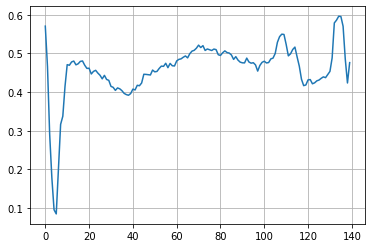

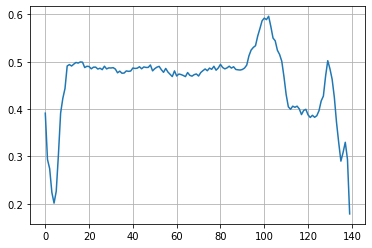

In [2]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)

# Normalize the dataset to [0, 1]
min_val = tf.reduce_min(train_data) 
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

# Unified data format to float32
train_data = tf.cast(train_data, tf.float32) 
test_data = tf.cast(test_data, tf.float32)

# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0]) 
plt.show()

plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()

MLP in sklearn

In [3]:
##-------MLP in sklearn
start_sk_mlp = time()
clf = MLPClassifier(hidden_layer_sizes = 64, activation = 'logistic').fit(train_data, train_labels)
end_sk_mlp = time()
print("MLP-sklearn")
print(clf.loss_) #print the loss
print(clf.score(test_data, test_labels)) #print the accuracy
print("Running time: %s seconds"%(end_sk_mlp - start_sk_mlp))

MLP-sklearn
0.046112986084905994
0.987
Running time: 6.339902877807617 seconds


MLP in keras

In [4]:
##-------MLP in keras
start_keras_mlp = time()
model_mlp = Sequential()
model_mlp.add(Dense(64, activation = 'sigmoid', input_dim=140)) #add the hidden layer with size 64
model_mlp.add(Dense(1,activation = 'sigmoid')) #use sigmoid to ensure the [0,1] restriction 
#model.summary()
model_mlp.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy', #binary_crossentropy is used in two classification problem
              metrics=['accuracy'])
train_data_mlp = np.array(train_data) #adjust the type of data to fit the method.
train_labels_mlp = np.array(train_labels)
test_data_mlp = np.array(test_data)
test_labels_mlp = np.array(test_labels) 
model_mlp_fit = model_mlp.fit(train_data_mlp,train_labels_mlp,epochs=50,batch_size=32) #return a history object
score = model_mlp.evaluate(test_data_mlp,test_labels_mlp,batch_size=32)  #return the vector of loss and accuracy
end_keras_mlp = time()
#accuracy and loss for MLP
mlp_accuracy = model_mlp_fit.history['accuracy'] #extract the accuracy for each epochs.
mlp_loss = model_mlp_fit.history['loss'] ##extract the loss for each epochs.
print("MLP-keras")
print(score)
print("Running time: %s seconds"%(end_keras_mlp - start_keras_mlp))

Epoch 1/50
125/125 [==============================] - 1s 1ms/step - loss: 0.6297 - accuracy: 0.6432
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.9162
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2826 - accuracy: 0.9478
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1867 - accuracy: 0.9562
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9541
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1355 - accuracy: 0.9567
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9654
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9572
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0934 - accuracy: 0.9705
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9695

CNN in Keras

In [5]:
##-------CNN in keras
start_cnn = time()
train_data_cnn = np.array(train_data).reshape(train_data.shape[0],train_data.shape[1],1) #reshape data to fit the model
test_data_cnn = np.array(test_data).reshape(test_data.shape[0],test_data.shape[1],1)
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size = 16, activation = 'relu', input_shape=(train_data.shape[1],1))) 
#model_cnn.add(Conv1D(64, kernel_size = 16, activation = 'relu', input_shape=(140,1)))
model_cnn.add(MaxPooling1D())
model_cnn.add(Flatten())
model_cnn.add(Dense(1,activation='sigmoid'))
model_cnn.compile(optimizer = 'rmsprop',
               loss = 'binary_crossentropy',
               metrics=['accuracy'])
model_cnn_fit = model_cnn.fit(train_data_cnn,train_labels,epochs=50,batch_size=32)
score_cnn = model_cnn.evaluate(test_data_cnn,test_labels,batch_size=32)
end_cnn = time()
#accuracy and loss for CNN
cnn_accuracy = model_cnn_fit.history['accuracy'] ##extract the accuracy for each epochs.
cnn_loss = model_cnn_fit.history['loss'] ##extract the loss for each epochs.
print("CNN-keras")
print(score_cnn)
print("Running time: %s seconds"%(end_cnn - start_cnn))

Epoch 1/50
125/125 [==============================] - 2s 7ms/step - loss: 0.5912 - accuracy: 0.6625
Epoch 2/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1612 - accuracy: 0.9653
Epoch 3/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0834 - accuracy: 0.9737
Epoch 4/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0711 - accuracy: 0.9772
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0645 - accuracy: 0.9797
Epoch 6/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0581 - accuracy: 0.9833
Epoch 7/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0454 - accuracy: 0.9864
Epoch 8/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0442 - accuracy: 0.9878
Epoch 9/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0471 - accuracy: 0.9880
Epoch 10/50
125/125 [==============================] - 1s 7ms/step - loss: 0.0491 - accuracy: 0.9860

LSTM in keras

In [6]:
##-------LSTM in keras
start_lstm = time()
train_data_lstm = np.array(train_data).reshape(train_data.shape[0],14,10) #reshape data to fit the model
test_data_lstm = np.array(test_data).reshape(test_data.shape[0],14,10)
model_lstm = Sequential()
model_lstm.add(LSTM(64,input_shape=(14,10))) #64 units
model_lstm.add(Dense(1,activation = 'sigmoid'))
model_lstm.compile(optimizer = 'rmsprop',
                loss = 'binary_crossentropy',
                metrics=['accuracy'])
model_lstm_fit = model_lstm.fit(train_data_lstm,train_labels,epochs=50,batch_size=32)
score_lstm = model_lstm.evaluate(test_data_lstm,test_labels,batch_size=32)
end_lstm = time()
#accuracy and loss for LSTM
lstm_accuracy = model_lstm_fit.history['accuracy'] #extract the accuracy for each epochs.
lstm_loss = model_lstm_fit.history['loss'] #extract the loss for each epochs.
print("LSTM-keras")
print(score_lstm)
print("Running time: %s seconds"%(end_lstm - start_lstm))

Epoch 1/50
125/125 [==============================] - 3s 9ms/step - loss: 0.6449 - accuracy: 0.6172
Epoch 2/50
125/125 [==============================] - 1s 9ms/step - loss: 0.4307 - accuracy: 0.9267
Epoch 3/50
125/125 [==============================] - 1s 10ms/step - loss: 0.1436 - accuracy: 0.9593
Epoch 4/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0779 - accuracy: 0.9749
Epoch 5/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0661 - accuracy: 0.9792
Epoch 6/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0644 - accuracy: 0.9800
Epoch 7/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0701 - accuracy: 0.9757
Epoch 8/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0577 - accuracy: 0.9844
Epoch 9/50
125/125 [==============================] - 1s 10ms/step - loss: 0.0565 - accuracy: 0.9862
Epoch 10/50
125/125 [==============================] - 1s 9ms/step - loss: 0.0512 - accuracy: 0.98

Draw the plot

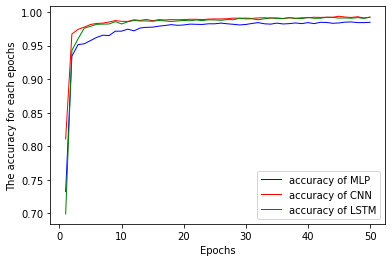

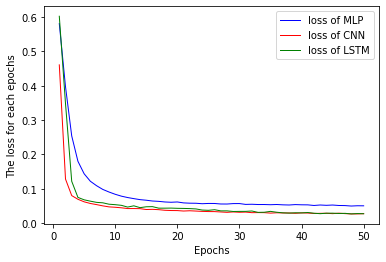

In [7]:
epochs = np.arange(1,51,1)
#plot for accuracy
plt.figure(figsize=(6,4))
plt.plot(epochs,mlp_accuracy, label = "accuracy of MLP", linewidth=1, color='blue')
plt.plot(epochs,cnn_accuracy, label = "accuracy of CNN", linewidth=1, color='red')
plt.plot(epochs,lstm_accuracy, label = "accuracy of LSTM", linewidth=1, color='green')
plt.xlabel("Epochs")
plt.ylabel("The accuracy for each epochs")
plt.legend(loc='best')
plt.show()
plt.close()

#plot for loss
plt.figure(figsize=(6,4))
plt.plot(epochs,mlp_loss, label = "loss of MLP", linewidth=1, color='blue')
plt.plot(epochs,cnn_loss, label = "loss of CNN", linewidth=1, color='red')
plt.plot(epochs,lstm_loss, label = "loss of LSTM", linewidth=1, color='green')
plt.xlabel("Epochs")
plt.ylabel("The loss for each epochs")
plt.legend(loc='best')
plt.show()
plt.close()